In [11]:
!pip install wordcloud
!pip install adjustText

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
from matplotlib.patches import Patch

In [120]:
def analyze_movie_data(file_path):
    # Load dataset
    df = pd.read_csv(file_path)

    # Rename columns for easier access and consistency
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

    # Convert 'release_date' to datetime format
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

    # Display basic info
    print("\nFirst few rows of the dataset:")
    print(df.head())
    print("\nDataset information:")
    df.info()
    print("\nSummary statistics:")
    print(df.describe())
    print("\nMissing values per column:")
    print(df.isnull().sum())

    # Distribution of vote averages
    plt.figure(figsize=(8, 4))
    sns.histplot(df['vote_average'], kde=True, bins=20)
    plt.title('Distribution of Vote Averages')
    plt.xlabel('Vote Average')
    plt.ylabel('Frequency')
    plt.show()

    # Distribution of revenue and budget
    plt.figure(figsize=(8, 4))
    sns.histplot(df['revenue'], kde=True, bins=20)
    plt.title('Distribution of Revenue')
    plt.xlabel('Revenue')
    plt.ylabel('Frequency')
    plt.xscale('log')  # Log scale for better visibility
    plt.show()

    plt.figure(figsize=(8, 4))
    sns.histplot(df['budget'], kde=True, bins=20)
    plt.title('Distribution of Budget')
    plt.xlabel('Budget')
    plt.ylabel('Frequency')
    plt.xscale('log')  # Log scale for better visibility
    plt.show()

    # Popularity distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(df['popularity'], kde=True, bins=20)
    plt.title('Distribution of Popularity')
    plt.xlabel('Popularity')
    plt.ylabel('Frequency')
    plt.show()

    # Release date trends
    plt.figure(figsize=(12, 6))
    df['release_year'] = df['release_date'].dt.year
    sns.countplot(data=df, x='release_year')
    plt.title('Number of Movies Released by Year')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Movies')
    plt.xticks(rotation=45)
    plt.show()

    # pie-chart indicating the proportion of movies by release decade
    df['release_decade'] = (df['release_date'].dt.year // 10) * 10
    decade_counts = df['release_decade'].value_counts().sort_index()
    
    plt.figure(figsize=(8, 8))
    decade_counts.plot(kind='pie', autopct='%1.0f%%', startangle=90, colors=sns.color_palette('Spectral'), fontsize=10)
    plt.title('Proportion of Movies by Release Decade')
    plt.ylabel('')
    plt.show()


    # Relationship between budget and revenue using transformed data
    plt.figure(figsize=(10, 6))
    
    # Transforming data for log scale
    log_budget = np.log1p(df['budget'])  # log1p handles log(0) properly
    log_revenue = np.log1p(df['revenue'])
    
    # Scatter plot with regression line
    sns.regplot(x=log_budget, y=log_revenue, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    plt.title('Budget vs Revenue with Regression Line (Log Scale)')
    plt.xlabel('Log(Budget)')
    plt.ylabel('Log(Revenue)')
    plt.show()

   # Select a subset of movies for clearer visualization (30 movies)
    subset = df.sample(n=30, random_state=1)

    # Calculate the difference between revenue and budget
    df['profit'] = df['revenue'] - df['budget']

   # Calculate the difference between revenue and budget
    subset['profit'] = subset['revenue'] - subset['budget']

    # Horizontal bar plot for Budget and Revenue
    plt.figure(figsize=(10, 6))
    bar_width = 0.35
    index = range(len(subset))

    # Create horizontal bars for Budget
    plt.barh(index, subset['budget'], bar_width, label='Budget', color='skyblue')
    
    # Create horizontal bars for Revenue, offset by bar width
    plt.barh([i + bar_width for i in index], subset['revenue'], bar_width, label='Revenue', color='orange')
    
    plt.yticks([i + bar_width / 2 for i in index], subset['title'])  # Movie titles on y-axis
    plt.xlabel('Amount £)', fontsize=14)
    plt.title('Budget vs Revenue for Selected Movies', fontsize=16)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Bar plot for Profit (Revenue - Budget)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=subset, x='title', y='profit')
    plt.axhline(0, color='black', linewidth=1, linestyle='--')  # Line at y=0 for reference
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Movies', fontsize=14)
    plt.ylabel('Profit (£)', fontsize=14)
    plt.title('Profit (Revenue - Budget) for Selected Movies', fontsize=16)
    plt.tight_layout()
    plt.show()
    
    # Heatmap of correlations
    plt.figure(figsize=(12, 8))
    
    # Select only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numeric_cols].corr()

    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(correlation_matrix))
    plt.title('Correlation Heatmap')
    plt.show()

    # Distribution of genres
    plt.figure(figsize=(12, 6))
    # Ensure correct parsing and counting of genres
    genre_counts = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else []).explode().value_counts()
    
    # Plotting genres
    genre_counts.plot(kind='bar', color='cornflowerblue')
    plt.title(' Genres by Count')
    plt.xlabel('Genres')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

    # Check for license_fee column and plot if it exists
    if 'license_fee' in df.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df['license_fee'], kde=True, bins=20)
        plt.title('Distribution of License Fees')
        plt.xlabel('License Fee')
        plt.ylabel('Frequency')
        plt.show()

    # Boxplot for outliers
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[['budget', 'revenue', 'popularity', 'vote_average']], orient='h', palette='Set3')
    plt.title('Outliers in Numerical Columns')
    plt.show()

    # Budget, Revenue, and Popularity over time
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df, x='release_year', y='budget', label='Budget', errorbar=None)
    sns.lineplot(data=df, x='release_year', y='revenue', label='Revenue', errorbar=None)
    sns.lineplot(data=df, x='release_year', y='popularity', label='Popularity', errorbar=None)
    plt.title('Trends in Budget, Revenue, and Popularity Over Time')
    plt.xlabel('Release Year')
    plt.ylabel('Average Value')
    plt.legend()
    plt.show()

    # Top 10 Movies by Profit
    top_movies = df.nlargest(10, 'profit')
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=top_movies, x='profit', y='title')
    plt.title('Top 10 Movies by Profit')
    plt.xlabel('Profit (£)')
    plt.ylabel('Movies')
    plt.tight_layout()
    plt.show()

    # Scatter plot for Revenue vs Popularity
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='popularity', y='revenue', alpha=0.6)
    plt.title('Popularity vs Revenue')
    plt.xlabel('Popularity')
    plt.ylabel('Revenue (£)')
    plt.xscale('log')  # Handle skewness
    plt.yscale('log')  # Handle skewness
    plt.show()
    
    # Combine all titles into a single string
    all_titles = ' '.join(df['title'].dropna())
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Movie Titles')
    plt.show()
    

    # Runtime distribution
    plt.figure(figsize=(8, 4))
    sns.histplot(df['runtime'], kde=True, bins=20)
    plt.title('Distribution of Movie Runtimes')
    plt.xlabel('Runtime (minutes)')
    plt.ylabel('Frequency')
    plt.show()

    # Average revenue and popularity by genre
    df['genres_list'] = df['genres'].apply(lambda x: eval(x) if isinstance(x, str) else [])
    genre_revenue_popularity = df.explode('genres_list').groupby('genres_list')[['revenue', 'popularity']].mean().sort_values('revenue', ascending=False)

    plt.figure(figsize=(14, 8))
    sns.boxplot(data=df.explode('genres_list'), x='genres_list', y='revenue', showfliers=False)
    plt.title('Revenue Distribution by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Revenue (£)')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='popularity', y='revenue', size='profit', hue='profit', alpha=0.7, palette='cool')
    plt.title('Revenue vs Popularity (Bubble Size = Profit)')
    plt.xlabel('Popularity')
    plt.ylabel('Revenue ($)')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend(title='Profit', loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.boxplot(data=df.explode('genres_list'), x='genres_list', y='runtime', showfliers=False)
    plt.title('Runtime Distribution by Genre')
    plt.xlabel('Genre')
    plt.ylabel('Runtime (minutes)')
    plt.xticks(rotation=45)
    plt.show()

    # Dist of movies by genres
    plt.figure(figsize=(8, 8))
    genre_counts.plot(kind='pie', autopct='%1.0f%%', startangle=90, colors=sns.color_palette('pastel'), fontsize=10)
    plt.title('Distribution of Movies by Genre')
    plt.ylabel('')  # Remove the default ylabel
    plt.show()
  
    
    # Proportion of Movies by Rating Categories
    rating_bins = [0, 3, 5, 7, 10]
    rating_labels = ['Poor ratings : (0-3)', 'Below avg : (3-5)', 'Avg (5-7)', 'Excellent (7-10)']
    df['rating_category'] = pd.cut(df['vote_average'], bins=rating_bins, labels=rating_labels)
    rating_counts = df['rating_category'].value_counts(sort=False)
    # Define colors for the pie chart (ensuring order corresponds to categories)
    colors = sns.color_palette('Set2', len(rating_counts))
    
    plt.figure(figsize=(8, 8))
    ax = rating_counts.plot(kind='pie', autopct='%1.0f%%', startangle=90, colors=colors,
                            fontsize=10, pctdistance=0.85, labels=[""] * len(rating_counts))
    
    # Create a legend that matches the colors of the pie slices
    legend_patches = [Patch(color=colors[i], label=label) for i, label in enumerate(rating_counts.index)]
    plt.legend(handles=legend_patches, title="Rating Categories", loc='upper left', bbox_to_anchor=(1, 1), 
               frameon=False, fontsize=10)
    plt.title('Proportion of Movies by Rating Categories')
    plt.ylabel('')
    plt.subplots_adjust(left=0.1, right=0.85, top=0.9, bottom=0.1)
    plt.show()
    

    print("\nEDA Complete.")

# ADDING LICENSE FEE COLUMN

In [121]:
movie_db_df = pd.read_csv('data/movie_database.csv', parse_dates=['release_date'])

# Define parameters for license fee calculation
base_fee = 10_000
profit_margin = 0.2
budget_factor = 0.002
box_office_factor = 0.001

# Check if 'license_fee' column exists
if 'license_fee' not in movie_db_df.columns:
    # Calculate license fee
    movie_db_df['license_fee'] = (
        base_fee 
        + (budget_factor * movie_db_df['budget']) 
        + (box_office_factor * movie_db_df['revenue'])
    ) * (1. + profit_margin)

    # rounding
    movie_db_df['license_fee'] = np.round(movie_db_df['license_fee'], 2)

    movie_db_df.to_csv('data/movie_database_with_license_fee.csv', index=False)
else:
    print("The 'license_fee' column already exists in the dataset.")

print("File saved as 'movie_database_with_license_fee.csv'")

File saved as 'movie_database_with_license_fee.csv'


In [122]:
movie_db_Lfee_df = pd.read_csv('data/movie_database_with_license_fee.csv', parse_dates=['release_date'])
movie_db_Lfee_df.head(2)

,title,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,genres,n_ad_breaks,runtime_with_ads,scaled_popularity,children_scaled_popularity,adults_scaled_popularity,retirees_scaled_popularity,license_fee
0,Inception,8.364,34495,2010-07-15,825532764,148,160000000,83.952,"['Action', 'Science Fiction', 'Adventure']",5,180.0,0.972027,0.777622,0.972027,0.388811,1386639.32
1,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,140.241,"['Adventure', 'Drama', 'Science Fiction']",6,210.0,1.000000,0.600000,1.000000,0.600000,1250075.05



First few rows of the dataset:
             title  vote_average  vote_count release_date     revenue  \
0        Inception         8.364       34495   2010-07-15   825532764   
1     Interstellar         8.417       32571   2014-11-05   701729206   
2  The Dark Knight         8.512       30619   2008-07-16  1004558444   
3           Avatar         7.573       29815   2009-12-15  2923706026   
4     The Avengers         7.710       29166   2012-04-25  1518815515   

   runtime     budget  popularity  \
0      148  160000000      83.952   
1      169  165000000     140.241   
2      152  185000000     130.643   
3      162  237000000      79.932   
4      143  220000000      98.082   

                                              genres  n_ad_breaks  \
0         ['Action', 'Science Fiction', 'Adventure']            5   
1          ['Adventure', 'Drama', 'Science Fiction']            6   
2           ['Drama', 'Action', 'Crime', 'Thriller']            6   
3  ['Action', 'Adventure', 'Fa

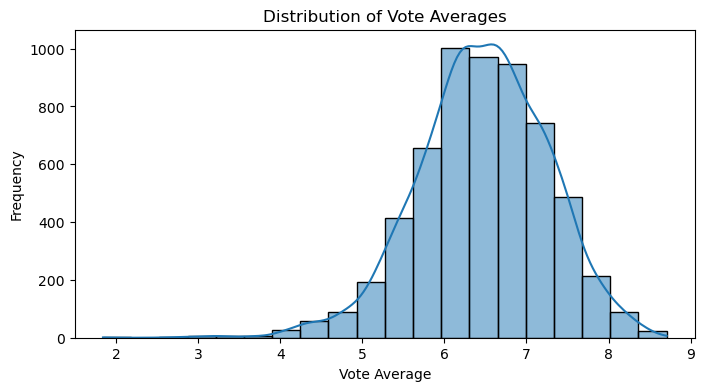

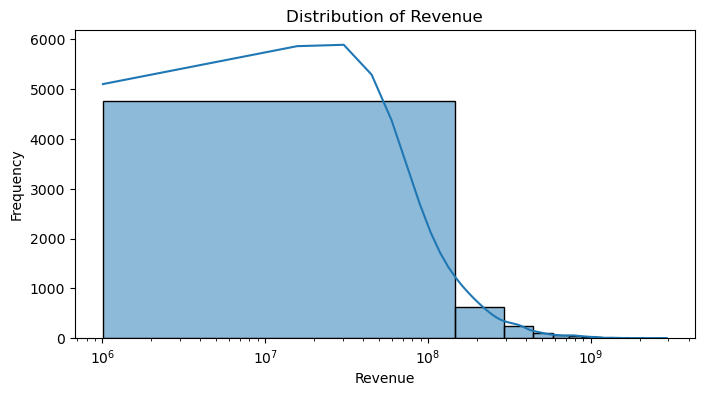

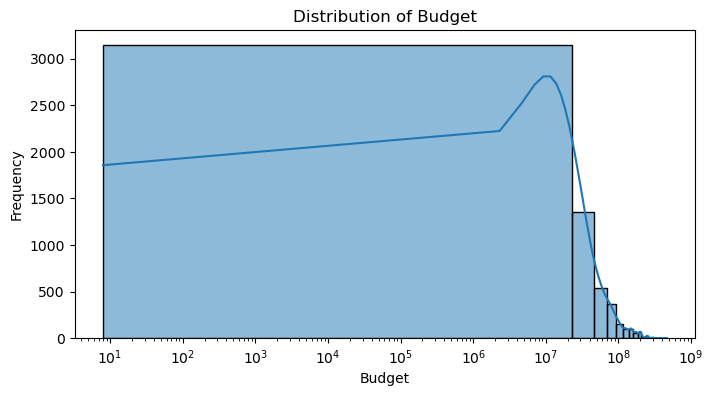

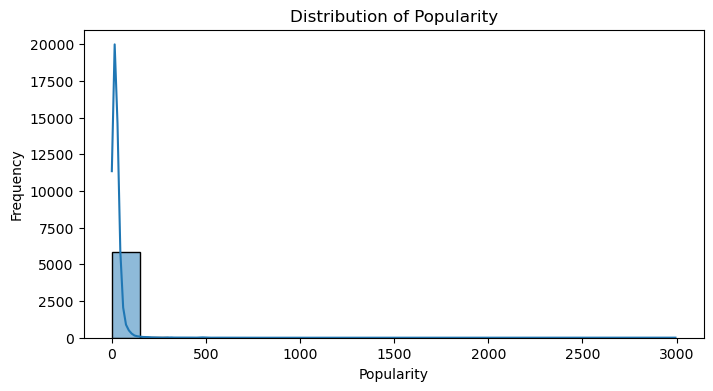

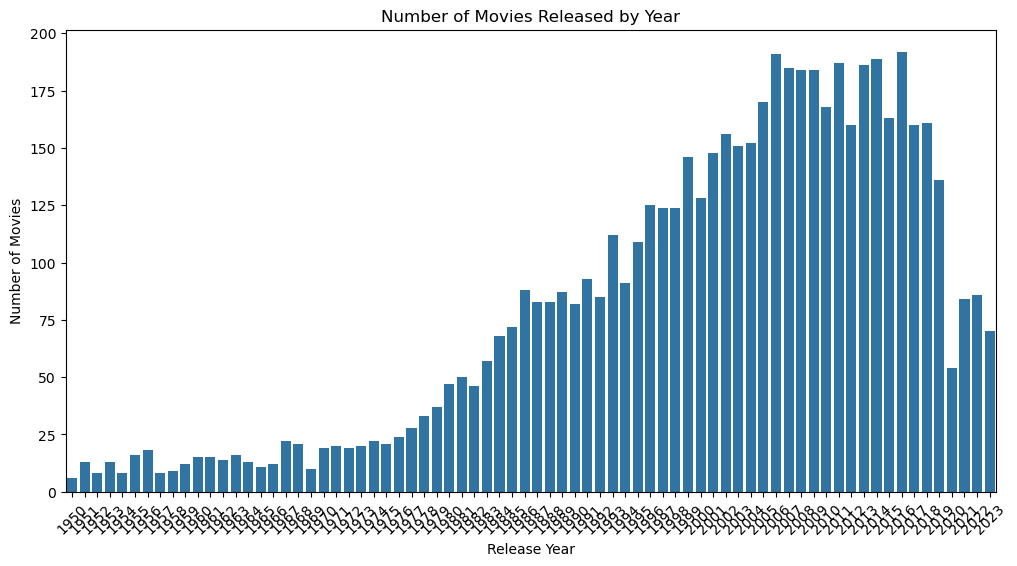

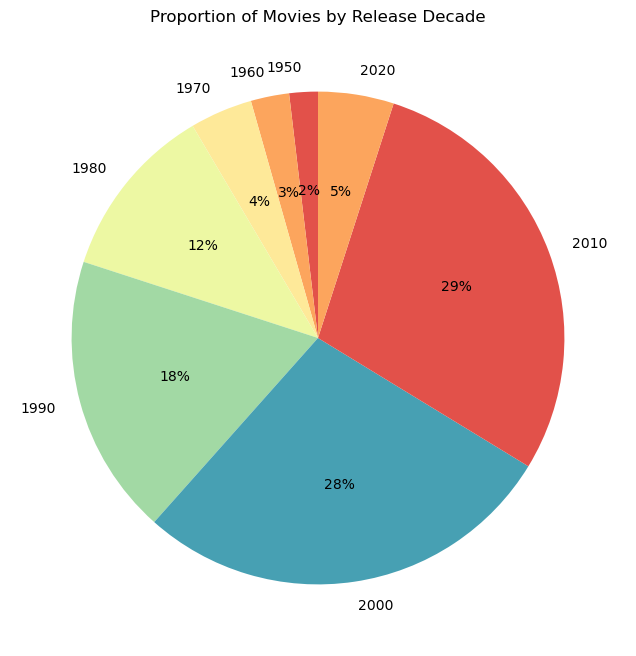

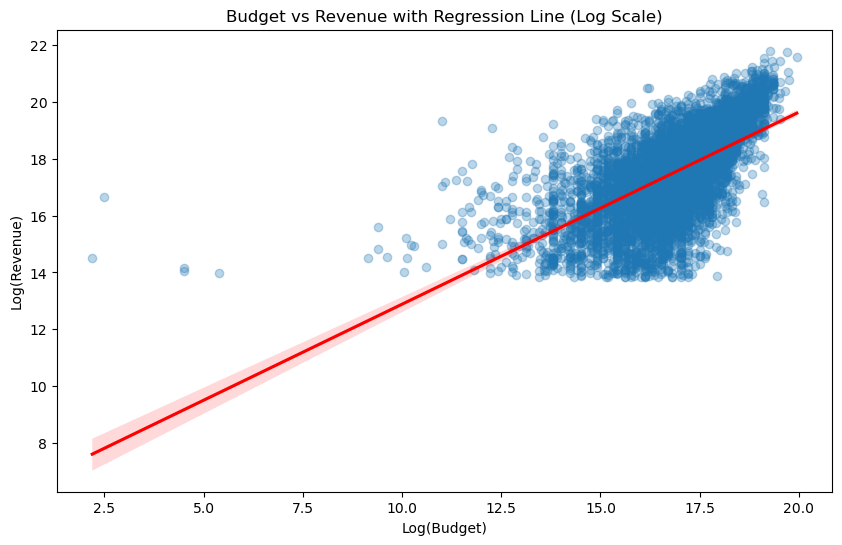

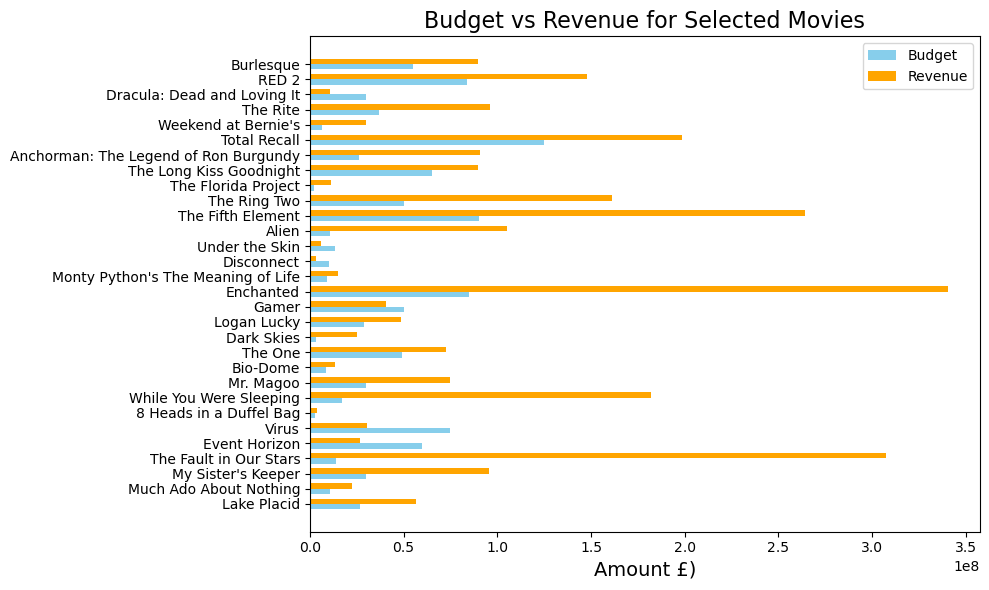

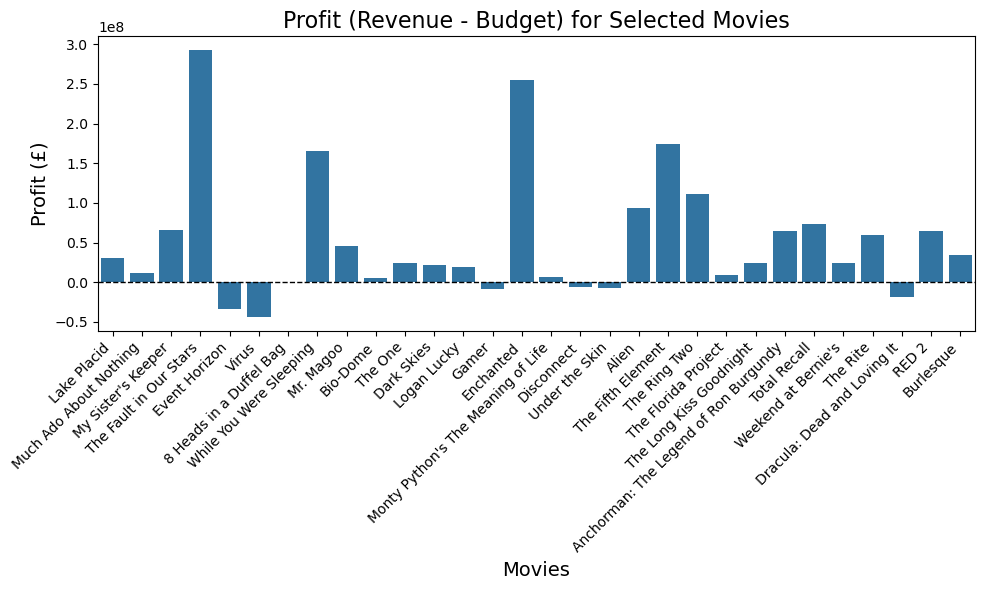

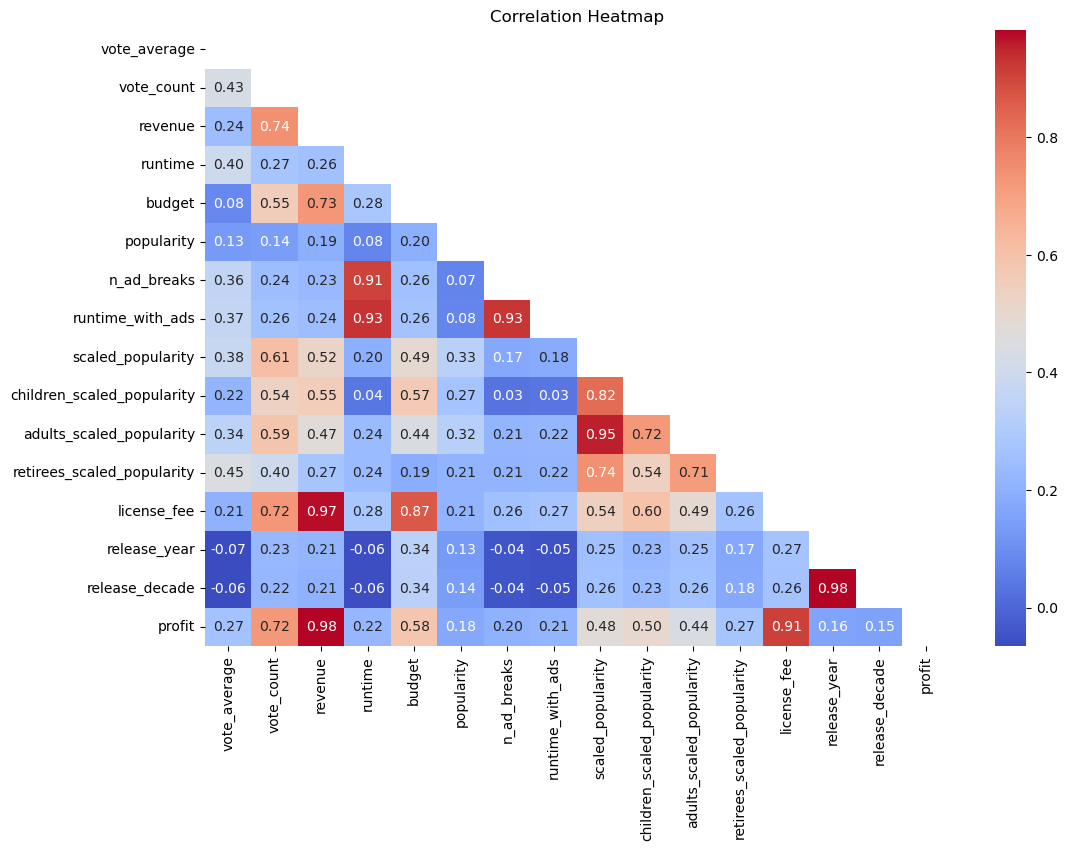

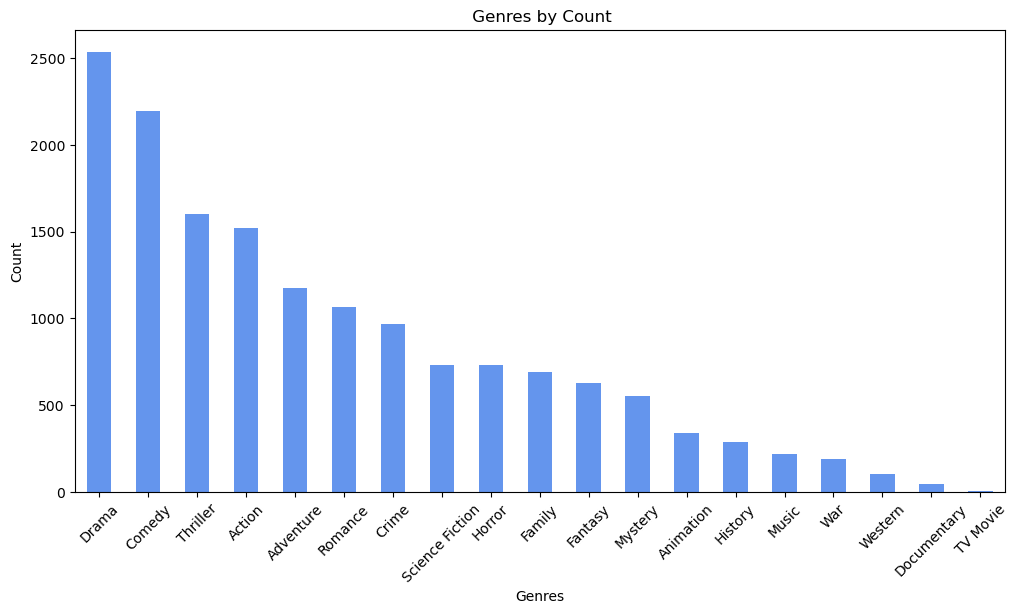

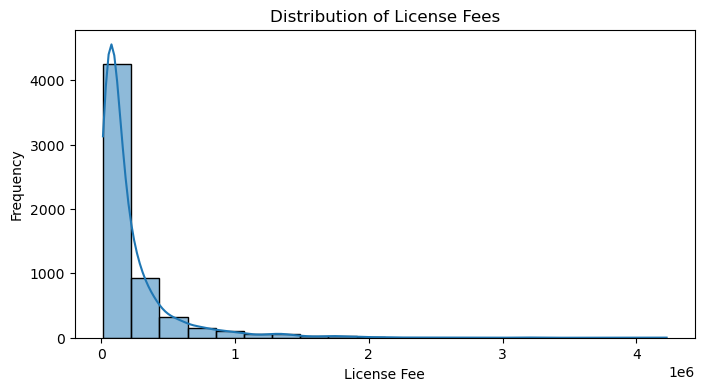

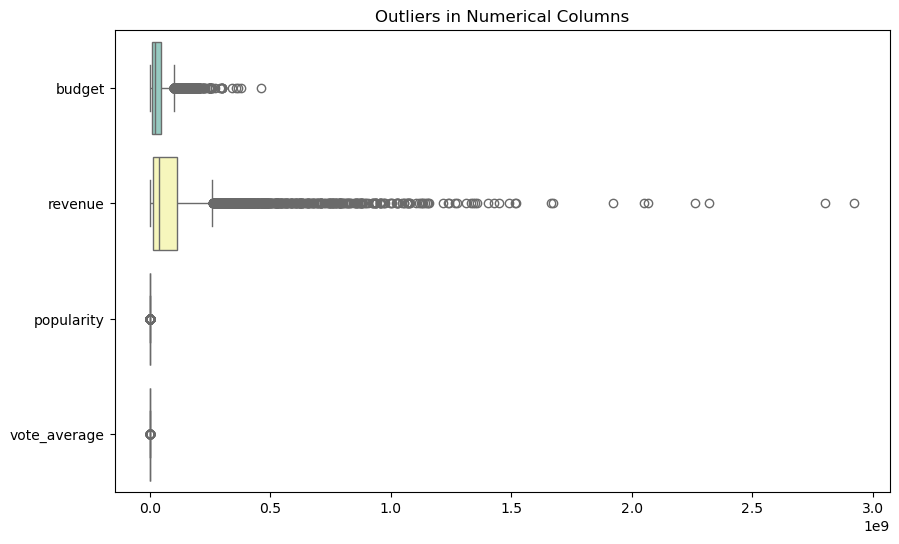

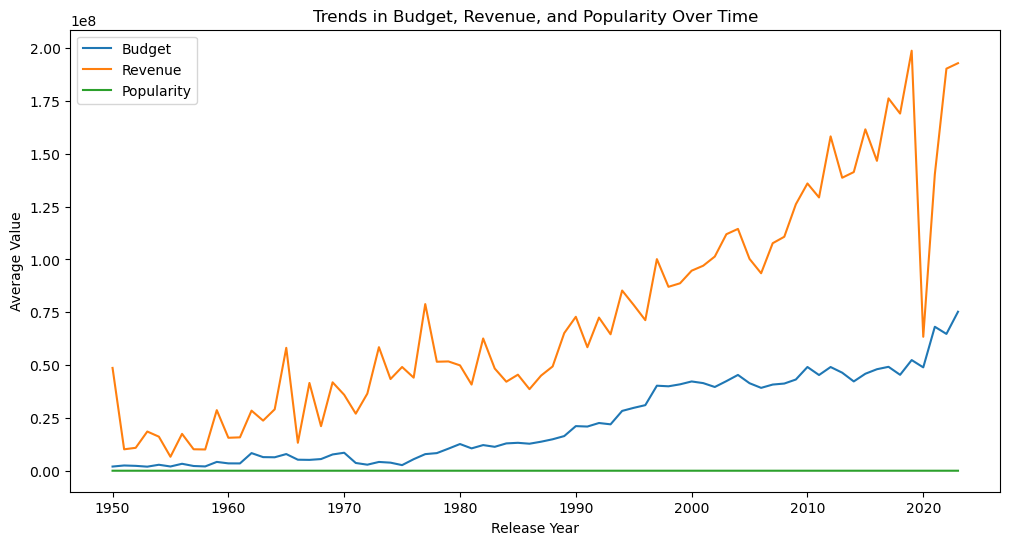

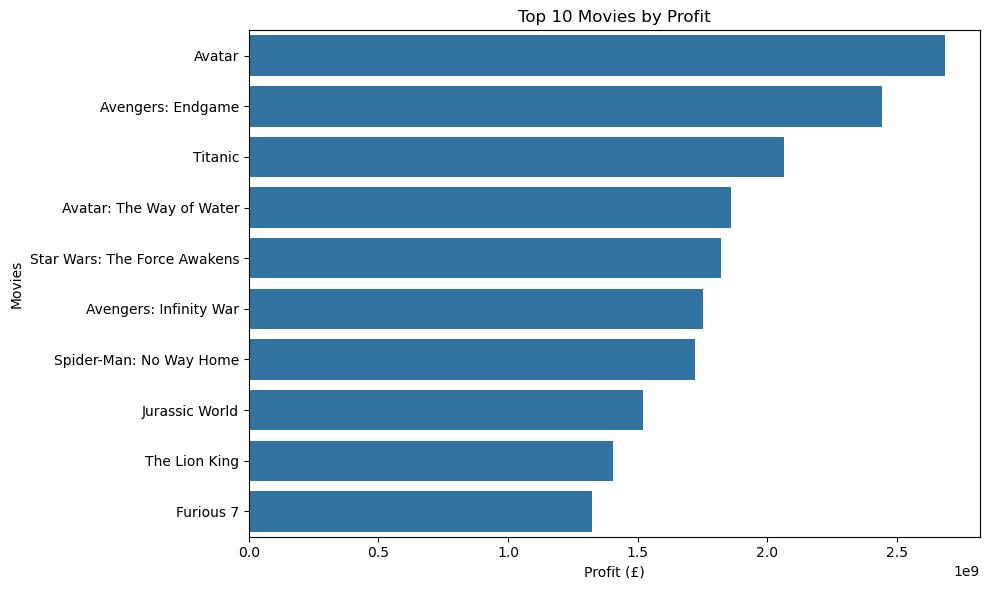

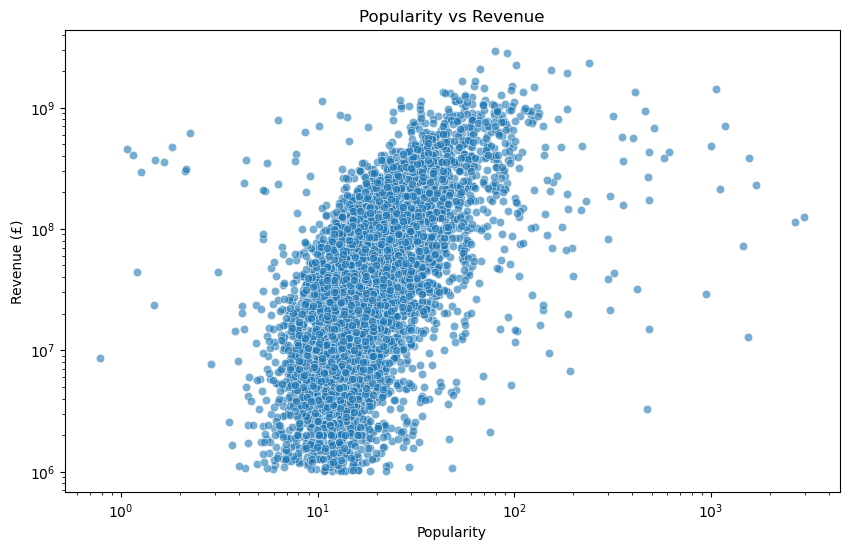

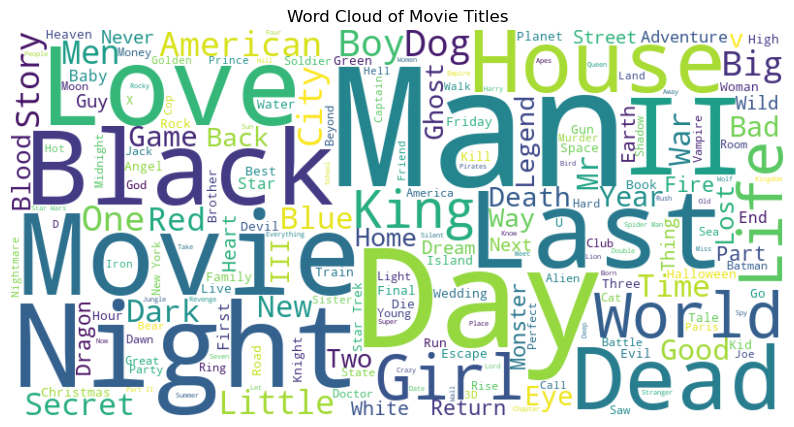

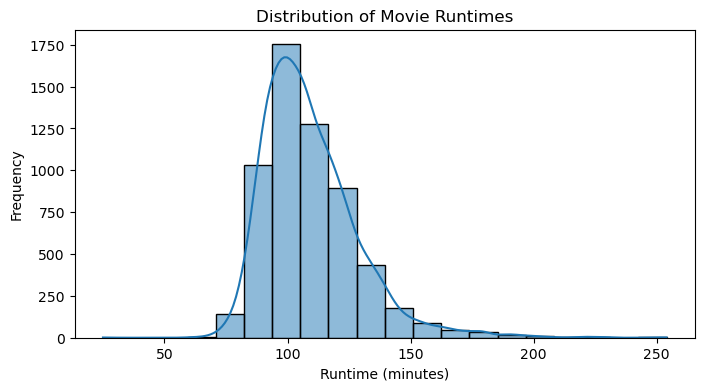

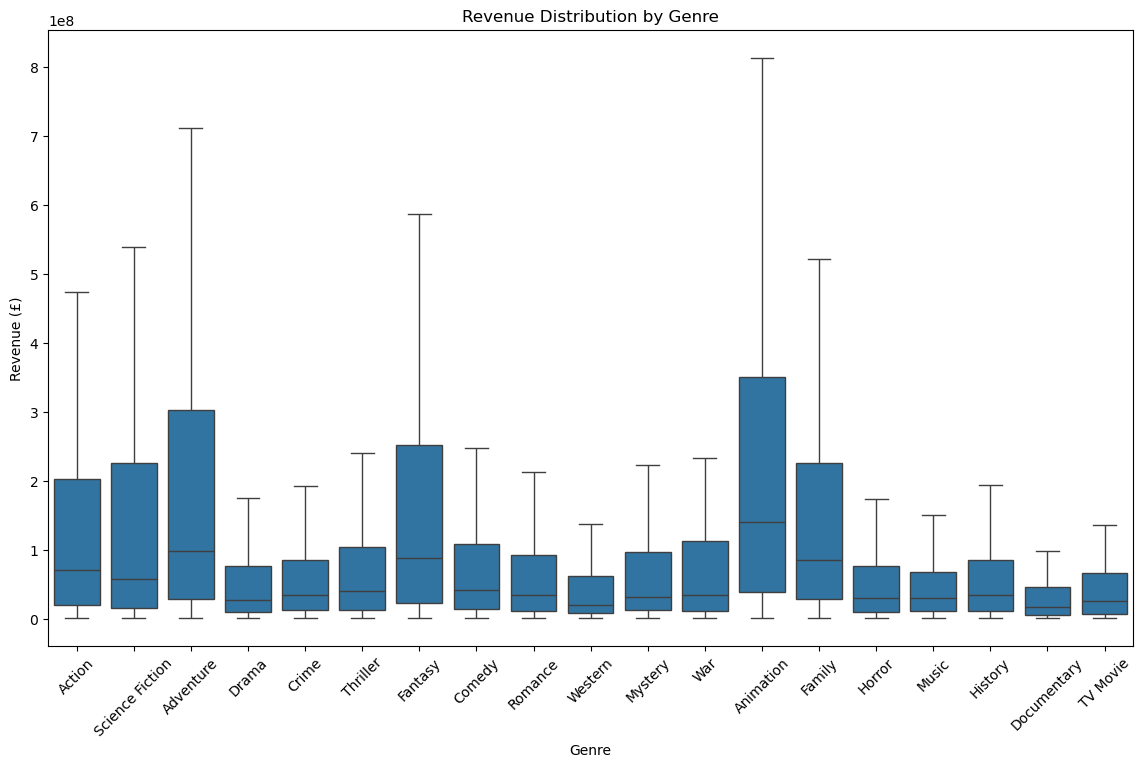

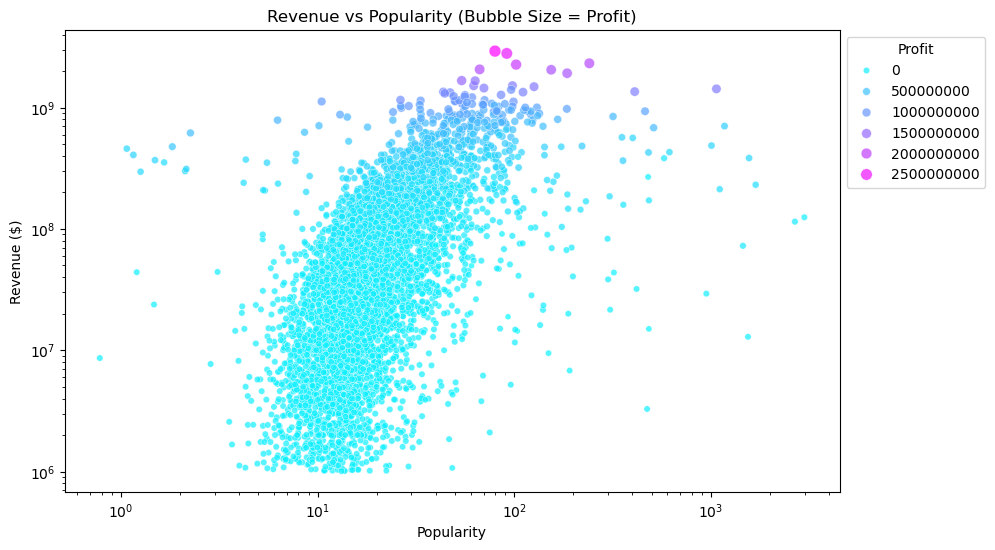

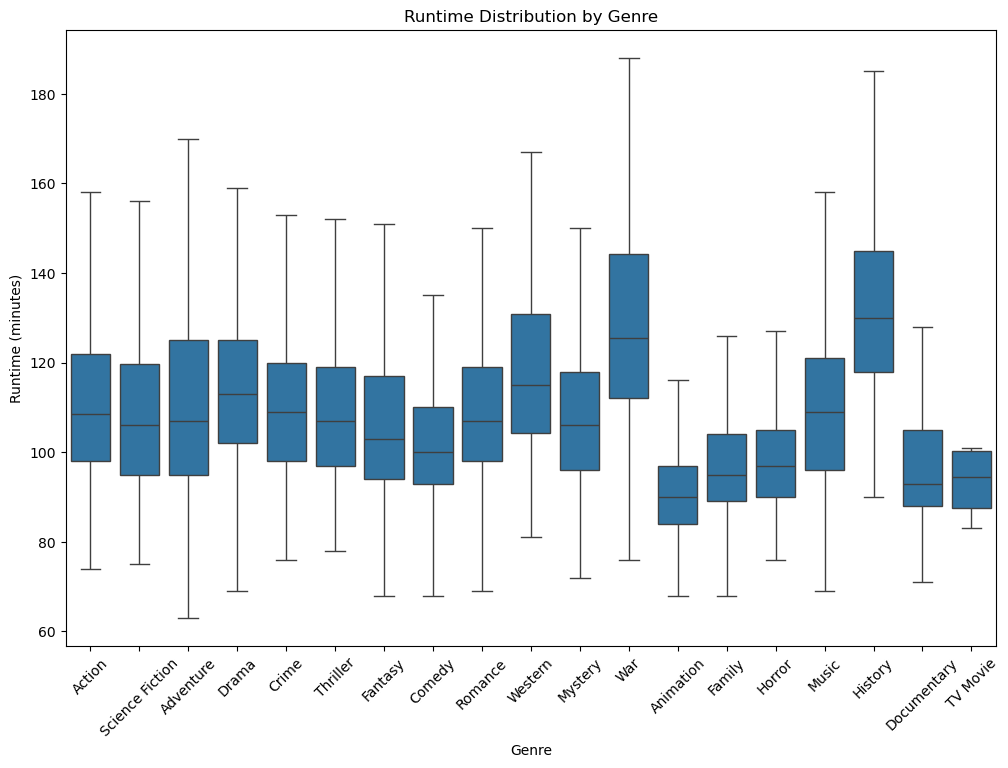

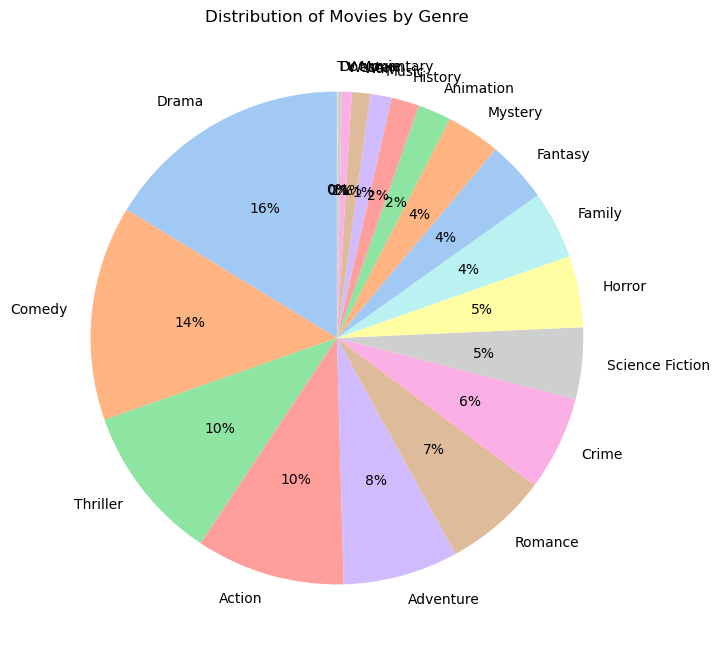

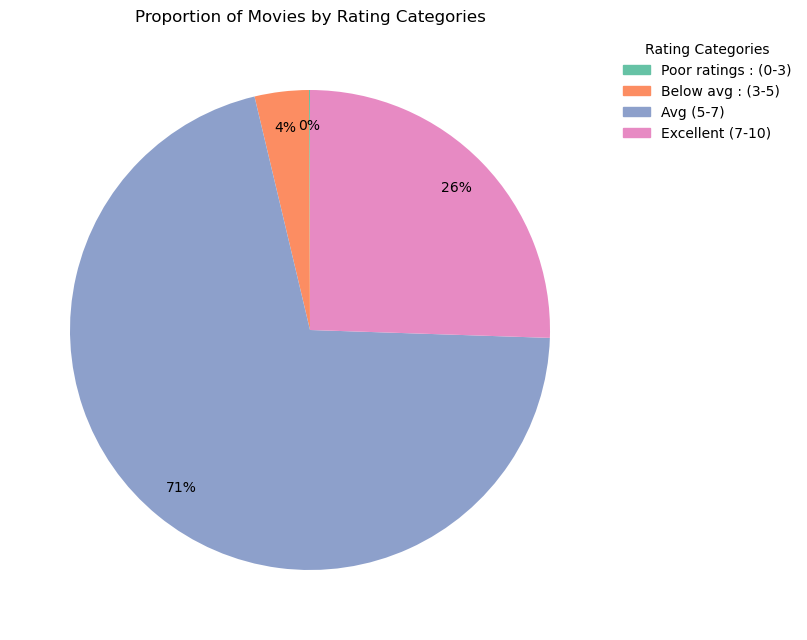


EDA Complete.


In [123]:
analyze_movie_data("data/movie_database_with_license_fee.csv")

# CLUSTER ANALYSIS

In [125]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [130]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [158]:
def cluster_movies(file_path, n_clusters=3):
    """
    This function performs clustering (we choose to use K-Means for simplicity) on movies based on budget, revenue, popularity, and vote_average.

    Args:
        file_path(str) : Path to the df (movie dataset).
        n_clusters (int): Number of clusters for K-Means.

    Returns:
        pd.DataFrame: Original dataframe with an added 'cluster' column.
    """
    df = pd.read_csv(file_path)
    # numeric features for clustering
    features = df[['budget', 'revenue', 'popularity', 'vote_average']].dropna()

    # features standardization to avoid scale effect
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Here we are applying KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = kmeans.fit_predict(scaled_features)

    df['cluster'] = -1  # Default to -1 for rows with NaN
    df.loc[features.index, 'cluster'] = clusters

    # Plot clusters
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x='popularity', y='revenue', hue='cluster', palette='Set2', alpha=0.9)
    plt.title(f'Movie Clusters (n_clusters={n_clusters})')
    plt.xlabel('Popularity')
    plt.ylabel('Revenue')
    plt.legend(title='Cluster')
    plt.show()

    return df


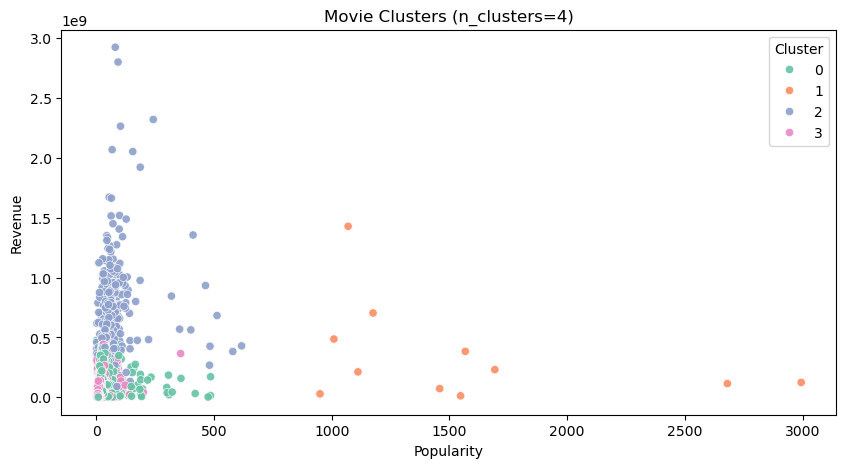

                                    title  cluster
4734                             Salvador        0
1816                           Flatliners        3
395                    Terminator Genisys        2
1214                      Jennifer's Body        3
2738                         Blood Simple        0
5161                                 Till        0
3260  Spy Kids: All the Time in the World        3
212                       American Beauty        0
1890                     The Time Machine        3
3225                      Seeking Justice        3


In [159]:
# Perform cluster analysis
df = cluster_movies("data/movie_database_with_license_fee.csv", n_clusters=4)

print(df[['title', 'cluster']].sample(10))


In [133]:
df[['title', 'cluster']].head(33)

,title,cluster
0,Inception,2
1,Interstellar,2
2,The Dark Knight,2
3,Avatar,2
4,The Avengers,2
5,Deadpool,2
6,Avengers: Infinity War,2
7,Fight Club,0
8,Guardians of the Galaxy,2
9,Pulp Fiction,0


In [154]:
# Group movies by their cluster and aggregate the titles
grouped_df = df.groupby('cluster')['title'].apply(list).reset_index()

grouped_df.columns = ['cluster', 'titles']

grouped_df

,cluster,titles
0,0,"[Fight Club, Pulp Fiction, The Shawshank Redem..."
1,1,"[Barbie, Fast X, Elemental, Meg 2: The Trench,..."
2,2,"[Inception, Interstellar, The Dark Knight, Ava..."
3,3,"[Twilight, Fantastic Four, Annihilation, The P..."


In [155]:
# for _, row in grouped_df.iterrows():
#     print(f"Cluster {row['cluster']}: {row['titles']}")
#     print()
#     print()
cluter1 = grouped_df[grouped_df["cluster"]==1]
for _, row in cluter1.iterrows():
    print(f"Cluster {row['cluster']}: {row['titles']}")

Cluster 1: ['Barbie', 'Fast X', 'Elemental', 'Meg 2: The Trench', 'Blue Beetle', 'Talk to Me', 'Gran Turismo', 'Sound of Freedom', 'The Nun II', 'Retribution', 'Saw X']
